# PyViz Goals:

- Full functionality in browsers (not desktop)
- Full interactivity (inside and out of plots)
- Focus on Python users, not web programmers
- Start with data, not coding
- Work with data of any size
- Exploit general-purpose SciPy/PyData tools
- Focus on 2D primarily, with some 3D
- Avoid entangling your data, code, and viz:
   * Same viz/analysis code in Jupyter, Python, HPC, ...
   * Widgets/apps in Jupyter, standalone servers, web pages
   * Jupyter as a tool, not part of the results

# Exploring Pandas Dataframes

If your data is in a Pandas dataframe, it's natural to explore it using the ``.plot()`` method (based on Matplotlib).  Let's look at a [dataset of the number of cases of measles and pertussis](http://graphics.wsj.com/infectious-diseases-and-vaccines/#b02g20t20w15) (per 100,000 people) over time in each state:

In [1]:
import pandas as pd

df = pd.read_csv('../../Downloads/diseases.csv.gz')
df.head()

Year  Week    State  measles  pertussis
0  1928     1  Alabama     3.67        NaN
1  1928     2  Alabama     6.25        NaN
2  1928     3  Alabama     7.95        NaN
3  1928     4  Alabama    12.58        NaN
4  1928     5  Alabama     8.03        NaN

In [2]:
df.columns

Index(['Year', 'Week', 'State', 'measles', 'pertussis'], dtype='object')

Just calling ``.plot()`` won't give anything meaningful, because it doesn't know what should be plotted against what:

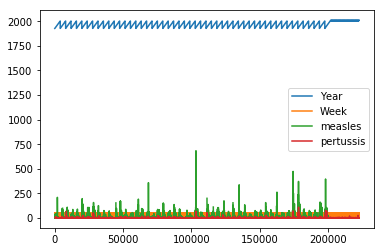

In [3]:
%matplotlib inline

df.plot();

But with some Pandas operations we can pull out parts of the data that make sense to plot:

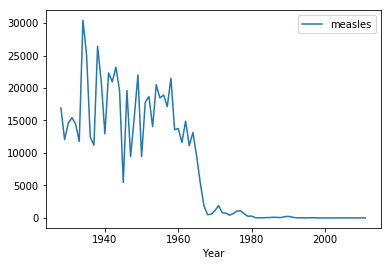

In [4]:
import numpy as np

by_year = df[["Year","measles"]].groupby("Year").aggregate(np.sum)
by_year.plot();

Here it is easy to see that the 1963 introduction of a measles vaccine brought the cases down to negligible levels.

# Exploring Data with hvPlot and Bokeh

The above plots are just static images, but if you import the `hvplot` package, you can use the same plotting API to get fully interactive plots with hover, pan, and zoom in a web browser:

In [5]:
import hvplot.pandas

by_year.hvplot()

:Curve   [Year]   (measles)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
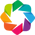

In [6]:
# Only needed here because we use matplotlib much later on...
import holoviews as hv
from holoviews import opts
hv.extension('bokeh', 'matplotlib', width="100")

Here the interactive features are provided by the [Bokeh](http://bokeh.pydata.org) JavaScript-based plotting library. But what's actually returned by this call is something called a [HoloViews](http://holoviews.org) object, here specifically a HoloViews [Curve](http://holoviews.org/reference/elements/bokeh/Curve.html).  HoloViews objects *display* as a Bokeh plot, but they are actually much richer objects that make it easy to capture your understanding as you explore the data:

In [7]:
import holoviews as hv
vline = hv.VLine(1963).opts(color='black')

m = by_year.hvplot() * vline * \
    hv.Text(1963, 27000, " Vaccine introduced", halign='left')
m

:Overlay
   .Curve.I :Curve   [Year]   (measles)
   .VLine.I :VLine   [x,y]
   .Text.I  :Text   [x,y]

while still always being able to access the original data involved for further analysis:

In [8]:
print(m)
m.Curve.I.data.head()

:Overlay
   .Curve.I :Curve   [Year]   (measles)
   .VLine.I :VLine   [x,y]
   .Text.I  :Text   [x,y]


Year   measles
0  1928  16924.34
1  1929  12060.96
2  1930  14575.11
3  1931  15427.67
4  1932  14481.11

For other plotting libraries, a given visualization that you construct is a dead end -- if you want to change it in some way, you'll need to reconstruct it from scratch with different settings.  

Because HoloViews objects preserve your original data, you can now do *more* with your data than you could before, including anything you could do with the raw data, plus overlaying (as above), laying out in subfigures, slicing, sampling, setting options, and many other operations.

For instance, with HoloViews it's simple to break down the data in different ways.  You can inspect each state individually:

In [9]:
measles_agg = df.groupby(['Year', 'State'])['measles'].sum()
by_state = measles_agg.hvplot('Year', groupby='State', width=500, dynamic=False)

by_state * vline

:HoloMap   [State]
   :Overlay
      .Curve.Measles :Curve   [Year]   (measles)
      .VLine.I       :VLine   [x,y]

Or pull out a couple of those to put side by side:

In [10]:
by_state["Texas"].relabel('Texas') + by_state["New York"].relabel('New York')

:Layout
   .Curve.Texas    :Curve   [Year]   (measles)
   .Curve.New_York :Curve   [Year]   (measles)

Or to compare four states over time by overlaying:

In [11]:
states = ['New York', 'New Jersey', 'California', 'Texas']
measles_agg.loc[1930:2005, states].hvplot(by='State') * vline

:Overlay
   .NdOverlay.Measles :NdOverlay   [State]
      :Curve   [Year]   (measles)
   .VLine.I           :VLine   [x,y]

Or by faceting:

In [12]:
measles_agg.loc[1930:2005, states].hvplot('Year', col='State', width=200, height=150, rot=90) * vline

:GridSpace   [State]
   :Overlay
      .Curve.Measles :Curve   [Year]   (measles)
      .VLine.I       :VLine   [x,y]

Or as a different type of plot, such as a bar chart:

In [13]:
measles_agg.loc[1980:1990, states].hvplot.bar('Year', by='State', rot=90)

:Bars   [Year,State]   (measles)

Or with additional information, such as error bars:

In [14]:
df_error = df.groupby('Year').agg({'measles': [np.mean, np.std]}).xs('measles', axis=1)
df_error.hvplot(y='mean') * hv.ErrorBars(df_error, 'Year').redim.range(mean=(0, None)) * vline

:Overlay
   .Curve.I     :Curve   [Year]   (mean)
   .ErrorBars.I :ErrorBars   [Year]   (mean,std)
   .VLine.I     :VLine   [x,y]

If we really want to invest a lot of time in making a fancy plot, we can customize it to try to show *all* the yearly data about measles at once:

In [15]:
def nansum(a, **kwargs):
    return np.nan if np.isnan(a).all() else np.nansum(a, **kwargs)

In [16]:
heatmap = df.hvplot.heatmap('Year', 'State', 'measles', reduce_function=nansum,
    logz=True, height=500, width=900, xaxis=None, flip_yaxis=True)

aggregate = hv.Dataset(heatmap).aggregate('Year', np.mean, np.std)
agg = hv.ErrorBars(aggregate) * hv.Curve(aggregate).opts(xrotation=90)
agg = agg.options(height=200, show_title=False)

marker = hv.Text(1963, 800, u'\u2193 Vaccine introduced', halign='left')

In [17]:
(heatmap + (agg * marker).opts(width=900)).cols(1)

:Layout
   .HeatMap.I :HeatMap   [Year,State]   (measles)
   .Overlay.I :Overlay
      .ErrorBars.I :ErrorBars   [Year]   (measles,measles_std)
      .Curve.I     :Curve   [Year]   (measles,measles_std)
      .Text.I      :Text   [x,y]

If you prefer, you can choose Matplotlib to render your HoloViews plots, though you give up the interactive pan, zoom, and hover from Bokeh:

In [18]:
mpl = by_state * hv.VLine(1963).opts(color="black") * \
      hv.Text(1963, 1000, "  Vaccine introduced", halign='left')
hv.output(mpl, backend='matplotlib')

:HoloMap   [State]
   :Overlay
      .Curve.Measles :Curve   [Year]   (measles)
      .VLine.I       :VLine   [x,y]
      .Text.I        :Text   [x,y]

As you can see, these tools make it very quick to explore your data in a browser, and if you choose HoloViews+Bokeh plots, you can have full interactivity with very little code even for quite complex datasets.

# Interactive statistical plots

For high-dimensional datasets with additional data variables, we can compose all the above faceting methods as needed.

For instance, let's look at the Iris dataset:

In [19]:
from bokeh.sampledata.iris import flowers as iris

iris.tail()

sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

We can now look at all these relationships at once, interactively:<span style="display:block; margin-top:-12px;"> </span>

In [20]:
hvplot.scatter_matrix(iris, c='species')

:GridMatrix   [X,Y]
   :NdOverlay   [species]
      :Histogram   [sepal_width]   (sepal_width_frequency)

# Branching out: large data, geo data, custom controls

PyViz is a modular suite of tools, and when you need capabilities not handled by Bokeh and HoloViews (and optionally hvPlot) as above, you can bring those in:
 
* [**GeoViews**](http://geoviews.org): Visualizable geographic HoloViews objects
* [**Datashader**](http://datashader.org): Rasterizing huge HoloViews objects to images quickly
* [**Param**](https://param.pyviz.org): Declarative parameters
* [**Panel**](https://panel.pyviz.org): Making it simple to work with widgets inside and outside of a notebook context
* [**Colorcet**](https://colorcet.pyviz.org): perceptually uniform colormaps for big data

We'll look at a large(ish) dataset of 10 million taxi trips on a map, with the following caveat:

<center><div class=\"alert alert-info\" role=\"alert\">The following examples rely on dynamic updates from a live Python server, and will not update fully when viewed statically on a standard website.</div></center><br>

In [ ]:
import dask.dataframe as dd, geoviews as gv, cartopy.crs as crs
from colorcet import palette
from holoviews.operation.datashader import datashade
from geoviews.tile_sources import EsriImagery

topts = hv.opts.WMTS(width=700, height=600, bgcolor='black', 
                     xaxis=None, yaxis=None, show_grid=False)
tiles = EsriImagery.clone(crs=crs.GOOGLE_MERCATOR).opts(topts) 
taxi  = dd.read_parquet('../data/nyc_taxi_wide.parq').persist()
colormaps = {n: palette[n] for n in ['fire','bgy','bgyw','bmy','gray','kbc']}

In [ ]:
def view(location='dropoff', cmap=colormaps['fire'], alpha=1):
    pts = hv.Points(taxi, [location+'_x', location+'_y'])
    trips = datashade(pts, cmap=cmap)
    return tiles.options(alpha=alpha) * trips

view()

As you can see, you can specify geo plots easily with GeoViews, and if your HoloViews objects are too big to visualize in a browser directly, you can add `datashade()` to render them into images dynamically on zooming, etc.

You can also easily add widgets to control filtering, selection, and other options interactively, either here in the notebook or by putting the same code in a separate file and running it as a standalone server:

In [ ]:
import panel as pn
explorer = pn.interact(view, cmap=colormaps, location=['dropoff', 'pickup'], alpha=(0, 1.))

pn.Row(pn.Column('# NYC Taxi Explorer', explorer[0]), explorer[1]).servable()

Here we used the Panel `interact` function to create a simple app based on the `view` function, and then we mixed and matched some of its components to lay it out in rows and columns as you see above.  

In this simple app, the `view` function is called whenever *any* of the parameters change (alpha, colormap, or location), triggering a full rerender, but you can get a more responsive interface if you take the time to declare which computations depend on which parameters (see the [Deploying Bokeh Apps tutorial](./13_Deploying_Bokeh_Apps.ipynb)).  

Either way, the app should work the same here in the notebook (if you have a live Python process) or as a standalone server by calling `panel serve` with either the name of a Python file with the above code or simply the name of this notebook (where it will run the notebook code and serve any objects marked `.servable()`).)

As you can see, the PyViz tools let you integrate visualization into everything you do, using a small amount of code that reveals your data's properties and captures your understanding of it. The rest of these tutorials will break down each of the topics covered above, showing you step by step how to work with your own data using these tools.

Thanks to all of the PyViz contributors!